### <center>2018 Winter CS101.02</center>

# <center>面向对象编程</center>

##### <center>by tanzhuxiaqiu@huawei.com</center>

## 今日议程

1. 目标、原则和模式
2. 软件开发
3. 类定义
4. 继承
5. 面向对象的命名空间
6. 深拷贝和浅拷贝

## 目标、原则和模式

- 每个对象(object)都是类(class)的实例(instance)
- 类的定义包含了变量(variable)和方法(methods)，又称为数据成员(data member)或成员函数(member function)

### 面向对象的设计目标

- 健壮性(Robustness)
- 适应性(Adapatability)
- 可重用性(Resuability)

### 面向对象的设计原则

- 模块化(Modularity)
- 抽象化(Abstraction)
    - 抽象数据类型(ADT, Abstract Data Types)
    - 抽象基类(ABC, Abstract Base Class)
- 封装(Encapsulation)

### 设计模式

- 算法设计模式
    - Recursion
    - Amortization
    - Divide-and-conquer
    - Dynamic programming
    - Greed method
- 软件工程设计模式
    - Iterator
    - Adaptor
    - Position
    - Composition
    - Template method
    - Locator
    - Factory method

## 软件开发

1. 设计
2. 实现
3. 测试和调试

### 设计

- 责任(Responsibility)
- 独立(Independence)
- 行为(Behavior)

### 编码风格和文档

- [PEP8](https://www.python.org/dev/peps/pep-0008/)
- docstring

### 测试和调试

- 自动化测试
    - 单元测试
    - 集成测试
    - 系统测试
    - 功能测试
    - 性能测试
    - ...
- 调试
    - print statement
    - debugger

## 类定义

- Unified Modeling Language
- 信用卡类UML图
![](./img/2-1.svg)

- 信用卡类代码实例
    - self标识符
    - 构造函数
    - 封装
    - 附加方法
    - 测试

In [1]:
class CreditCard:
    """A consumer credit card."""
    
    def __init__(self, customer, bank, acnt, limit):
        """Create a new credit card instance.
        
        The initial balance is zero.
        
        customer the name of the customer (e.g. Sean Tan)
        bank     the name of the bank (e.g. ICBC)
        acnt     the account identifier (e.g. 6200 0375 9983 1024)
        limit    credit limit (measured in RMB)
        """
        self._customer = customer
        self._bank = bank
        self._account = acnt
        self._limit = limit
        self._balance = 0
        
    def get_customer(self):
        """Return name of the customer."""
        return self._customer
    
    def get_bank(self):
        """Return the bank's name."""
        return self._bank
    
    def get_account(self):
        """Return the card identifying number(typically stored as a string)."""
        return self._account
    
    def get_limit(self):
        """Return current credit limit."""
        return self._limit
    
    def get_balance(self):
        """Return current balance."""
        return self._balance
    
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        
        Return True if charge was processed; False if charge was denied.
        """
        if price + self._balance > self._limit:
            return False
        self._balance  += price
        return True
    
    def make_payment(self, amount):
        """Process customer payment that reduces balance."""
        self._balance -= amount 

In [2]:
wallet = []
wallet.append(CreditCard('Sean Tan', 'ICBC', '6200 0375 9983 1024', 10000))
wallet.append(CreditCard('Sean Tan', 'CMB', '6200 0375 9983 1024', 20000))
wallet.append(CreditCard('Sean Tan', 'HKSC', '6200 0375 9983 1024', 5000))

for val in range(1, 17):
    wallet[0].charge(val)
    wallet[1].charge(val*2)
    wallet[2].charge(val*3)
    
for c in range(3):
    print("Customer: %s, Bank: %s, Limit: %d\nBalance: %d" % (wallet[c].get_customer(), wallet[c].get_bank(), wallet[c].get_limit(), wallet[c].get_balance()))
    while wallet[c].get_balance() > 100:
        wallet[c].make_payment(100)
        print("New balance: ", wallet[c].get_balance())
    print()

Customer: Sean Tan, Bank: ICBC, Limit: 10000
Balance: 136
New balance:  36

Customer: Sean Tan, Bank: CMB, Limit: 20000
Balance: 272
New balance:  172
New balance:  72

Customer: Sean Tan, Bank: HKSC, Limit: 5000
Balance: 408
New balance:  308
New balance:  208
New balance:  108
New balance:  8



### 重载和魔法方法

- 运算符重载
    - \_\_add\_\_, \_\_sub\_\_, \_\_mul\_\_, \_\_truediv\_\_, \_\_floordiv\_\_...
- 非运算符重载
    - \_\_contains\_\_, \_\_getitem\_\_, \_\_hash\_\_, \_\_iter\_\_...

### 迭代器

- Iterator：拥有一个名为 ** \_\_next\_\_ ** 的魔法方法，如果集合存在下一个元素则返回该元素，否则抛出一个StopIteration的异常
- 可以利用生成器语法生成一个迭代器

In [3]:
it = ( x for x in range(3))
print(next(it))
print(next(it))
print(next(it))
print(next(it))

0
1
2


StopIteration: 

- 使用**iter**关键字
- 自定义类可以重载\_\_next\_\_和\_\_iter\_\_魔法方法

In [4]:
class SequenceIterator:
    """An iterator for any Python sequence types."""

    def __init__(self, sequence):
        """Create an iterator for the given sequence."""
        self._seq = sequence
        self._k = -1

    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        self._k += 1
        if self._k < len(self._seq):
            return self._seq[self._k]
        else:
            raise StopIteration()

    def __iter__(self):
        """By convention, an iterator must return itself as an iterator."""
        return self


if __name__ == "__main__":
    si = SequenceIterator([ x for x in range(10)])
    print(next(si))
    for i in si:
        print(i)

0
1
2
3
4
5
6
7
8
9


## 继承

- 模块化(Modularity)和层次化(Hierarchical): 上层组件更加通用，下层组件更加具体
    - "is-a"关系
- 继承(Inheritance)
    - 基类(base class)/父类(parent class)/超类(super class)
    - 子类(subclass/child class)
    - 重写(override)/扩展(extend)

![](./img/2-3.svg)

![](./img/2-4.svg)

### 扩展CreditCard类

- 如果刷卡时出现超额度的消费，扣除5元的手续费
- 每月检查还款情况，如果有未还清的额度，收取相应的利息，利率通过构造函数的APR(Annual Percentage Rate)参数来指定

![](./img/2-2.svg)

In [5]:
class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees.
    """

    def __init__( , customer, bank, acnt, limit, apr):
        """Create a new predatory credit card instance.
        
        The initial balance is zero.
        
        customer the name of the customer (e.g. Sean Tan)
        bank     the name of the bank (e.g. ICBC)
        acnt     the account identifier (e.g. 6200 0375 9983 1024)
        limit    credit limit (measured in RMB)
        apr      annual precentage rate (e.g. 0.0825 for 8.25% APR)
        """
        super().__init__(customer, bank, acnt, limit)
        self._apr = apr

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.

        Return Ture if charge was processed.
        Return False and assess 5 yuan if charge id denied.
        """
        success = super().charge(price)
        if not success:
            self._balance += 5
        return success

    def process_month(self):
        """Assess monthly interest on outstanding balance.
        """
        if self._balance > 0:
            monthly_factor = pow(1 + self._apr, 1/12)
            self._balance *= monthly_factor

## 面向对象的命名空间

### 命名空间

- 实例命名空间
- 类命名空间

![](./img/2-5.svg)

#### 类数据成员

```python
class PredatoryCreditCard(CreditCard):
    OVERLIMIT_FEE = 5 # this is a class-level member
    
    def charge(self, price):
        success = super().charge(price)
        if not success:
            self._balance += PredatoryCreditCard.OVERLIMIT_FEE
        return success
```

#### 嵌套类

```python
class A:      # the outer class
    class B:  # the nested class
        ...
```

#### \_\_slots\_\_ 声明

```python
class CreditCard:
    __slots__ = '_customer', '_bank', '_account', '_balance', '_limit'
```

```python
class Predatory(CreditCard):
    __slots__ = '_apr'
```

### 名称解析

当用点运算符语法访问现有的成员(如obj.foo)时，Python解释器将开始一个名称解析的过程：

1. 在实例命名空间中搜索，如果找到对应的名称和关联值就可以直接使用；
2. 否则在该实例所属的类命名空间中搜索，如果找到对应的名称和关联值就可以使用；
3. 如果在直接的类命名空间中未找到，搜索会通过层次结构向上检索每一个父类的类名称空间，直到找到对应的名称和关联值；
4. 如果最终没法发现该对应的名称，就会引发一个**AtributeError**的异常。

## 深拷贝和浅拷贝

![](./img/2-6.png)

# Any Questions?

## 课后作业 Assignment-01

1) 实现一个简单的二维向量类Vector，使其满足以下条件：
- 可以通过构造函数Vector(x, y) 来构造新的Vector实例，如 v1 = Vector(1, 1), v2 = Vector(2, 3)；
- 向量之间支持“+”操作符，如 v3 = v1 + v2，其中v3的x，y值满足v3.x = v1.x + v2.x = 3, v3.y = v1.y + v2.y = 4；
- 向量支持与常数之间的“\*”操作，比如v2 * 2, 而v2的新的x，y值为v2(4, 6)；
- 向量支持内置的“abs”函数来计算其长度，比如abs(v3) = 5.0。


Vector参考图例

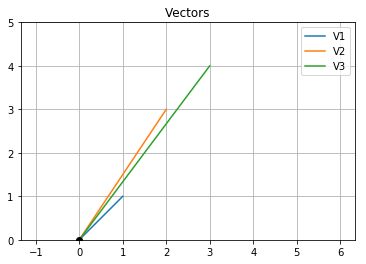

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

M = np.array([[1, 1], [2, 3], [3, 4]])
rows,cols = M.T.shape
for i,l in enumerate(range(0,cols)):
    xs = [0, M[i,0]]
    ys = [0, M[i,1]]
    plt.plot(xs,ys)

plt.plot(0, 0, 'ok') #<-- plot a black point at the origin
plt.axis('equal')  #<-- set the axes to the same scale
plt.xlim([0, 5]) #<-- set the x axis limits
plt.ylim([0, 5]) #<-- set the y axis limits
plt.legend(['V'+str(i+1) for i in range(cols)]) #<-- give a legend
plt.grid(b=True, which='major') #<-- plot grid lines
plt.title("Vectors")
plt.show()

2)以下代码段提供了一个未完成的 Progression 类，其目的是想实现一个基本的数列迭代器：

```python
class Progression:
    """Iterator producting a generic progression.

    Default iterator produces the whole numbers 0, 1, 2...
    """

    def __init__(self, start=0):
        """Initilize current value to the first value of the progression.
        """
        self._cur_val = start

    def _advance(self):
        """Update sefl._cur_val to a new value.

        This should be overriden by a subclass to customize progression.
        """
        self._cur_val += 1

    def __next__(self):
        """Return the next element, or else raise StopIteration error.
        """
        # TODO: Implement this method.
        pass

    def __iter__(self):
        """Return itself as an iterator.
        """
        # TODO: Implement this method.
        pass

    def print_progression(self, n):
        """Print next n values of the progression.
        """
        # TODO: Implement this method.
        pass

```

2.1)根据提供的注释修改其 \_\_next\_\_、\_\_iter\_\_和print_progression方法,使其完成一个递增数列(如数列[0, 1, 2...])迭代器的最基本操作；

2.2)以上面的Progression类为基类，通过继承Progression和重写其构造函数及_advance方法，分别实现一个等差数列(ArithmeticProgression)类、一个等比数列(GeometircProgression)类和一个斐波那契数列(FibonacciProgression)类，总体的UML图可参考下图。

![](./img/2-7.svg)